<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для обеспечения детерминированности результатов.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
from ydata_profiling import ProfileReport

print('10 случайных строк тренировочного датасета:\n', df_train.sample(10))
print('\nПервые 5 объектов тестового датасета:\n', df_test.head(5))
print('\nПоследние 5 объектов тестового датасета:\n', df_test.tail(5))

missing_test = df_test.isnull().sum()
missing_df = pd.DataFrame(missing_test[missing_test > 0]).reset_index()
missing_df.columns = ['Столбец', 'Количество пропусков']
print('\nПропуски в тестовом наборе данных:\n', missing_df)

missing_train = df_train.isnull().sum()
missing_df = pd.DataFrame(missing_train[missing_train > 0]).reset_index()
missing_df.columns = ['Столбец', 'Количество пропусков']
print('\nПропуски в тренировочном наборе данных:\n', missing_df)

duplicate_test  = df_test.apply(lambda col: col.duplicated(keep=False).sum())
duplicate_columns = duplicate_test[duplicate_test > 0]
duplicates_df = pd.DataFrame(duplicate_columns).reset_index()
duplicates_df.columns = ['Столбец', 'Количество дубликатов']
print('\nДубликаты в тестовом наборе данных:\n', duplicates_df)

duplicate_train = df_train.apply(lambda col: col.duplicated(keep=False).sum())
duplicate_columns = duplicate_train[duplicate_train > 0]
duplicates_df = pd.DataFrame(duplicate_columns).reset_index()
duplicates_df.columns = ['Столбец', 'Количество дубликатов']
print('\nДубликаты в тренировочном наборе данных:\n', duplicates_df)

print('\nКоличество полных дубликатов в тестовом наборе:', df_test.duplicated().sum())
print('Количество полных дубликатов в тренировочном наборе:', df_train.duplicated().sum())

profile = ProfileReport(df_train)
profile.to_file("df_train_report.html")
profile.to_notebook_iframe()

10 случайных строк тренировочного датасета:
                                         name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [4]:
numeric_columns = df_train.select_dtypes(include=['number'])
medians = numeric_columns.median()
df_train[numeric_columns.columns] = numeric_columns.apply(lambda x: x.fillna(medians[x.name]))

numeric_columns = df_test.select_dtypes(include=['number'])
df_test[numeric_columns.columns] = numeric_columns.apply(lambda x: x.fillna(medians[x.name]))

In [5]:
df_train[numeric_columns.columns].isnull().sum()

year             0
selling_price    0
km_driven        0
seats            0
dtype: int64

In [6]:
df_test[numeric_columns.columns].isnull().sum()

year             0
selling_price    0
km_driven        0
seats            0
dtype: int64

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [7]:
feature_columns = df_train.columns.difference(['selling_price'])
duplicates = df_train.duplicated(subset=feature_columns, keep=False)
print('Количество объектов с одинаковым признаковым описанием:', duplicates.sum())

Количество объектов с одинаковым признаковым описанием: 1799


In [8]:
df_train[duplicates].sort_values(list(feature_columns))

name  year  selling_price  km_driven    fuel  \
1335         Maruti Wagon R LXI Minor  2009         135000      50000  Petrol   
4743         Maruti Wagon R LXI Minor  2009         125000      50000  Petrol   
4314  Maruti Zen Estilo 1.1 VXI BSIII  2007         150000      70000  Petrol   
5922  Maruti Zen Estilo 1.1 VXI BSIII  2007         150000      70000  Petrol   
5413         Maruti Wagon R LXI Minor  2007         120000      70000  Petrol   
...                               ...   ...            ...        ...     ...   
3727        Hyundai Santro GS zipPlus  2001          60000      71000  Petrol   
4576                Maruti Esteem Lxi  2002          95000      90000  Petrol   
6437                Maruti Esteem Lxi  2002          95000      90000  Petrol   
503               Maruti Alto K10 LXI  2011         204999      97500  Petrol   
504               Maruti Alto K10 LXI  2011         204999      97500  Petrol   

     seller_type transmission         owner    mileage   engine max_power  \
1335  Individual       Manual  Second Owner  18.9 kmpl  1061 CC    67 bhp   
4743  Individual       Manual  Second Owner  18.9 kmpl  1061 CC    67 bhp   
4314  Individual       Manual   Third Owner  18.2 kmpl  1061 CC    64 bhp   
5922  Individual       Manual   Third Owner  18.2 kmpl  1061 CC    64 bhp   
5413  Individual       Manual  Second Owner  18.9 kmpl  1061 CC    67 bhp   
...          ...          ...           ...        ...      ...       ...   
3727  Individual       Manual  Second Owner        NaN      NaN       NaN   
4576  Individual       Manual   Third Owner        NaN      NaN       NaN   
6437  Individual       Manual   Third Owner        NaN      NaN       NaN   
503   Individual       Manual   First Owner        NaN      NaN         0   
504   Individual       Manual   First Owner        NaN      NaN         0   

             torque  seats  
1335  84Nm@ 3500rpm    5.0  
4743  84Nm@ 3500rpm    5.0  
4314  84Nm@ 3500rpm    5.0  
5922  84Nm@ 3500rpm    5.0  
5413  84Nm@ 3500rpm    5.0  
...             ...    ...  
3727            NaN    5.0  
4576            NaN    5.0  
6437            NaN    5.0  
503             NaN    5.0  
504             NaN    5.0  

[1799 rows x 13 columns]

In [9]:
df_train = df_train.drop_duplicates(subset=feature_columns, keep='first')
df_train.reset_index(drop=True, inplace=True)

In [10]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [11]:
def safe_float_conversion(value, column_name, replaced_value):
    try:
        if isinstance(value, str):
            return float(value.split()[0])
        return float(value)
    except (ValueError, TypeError):
        print(f"WARN: Не удалось преобразовать значение '{value}' в столбце {column_name} к типу float - значение заменено на {replaced_value}")
        return replaced_value

def preprocess_df(df):
    df = df.copy()
    for col in ['mileage', 'engine', 'max_power']:
        df[col] = df[col].apply(lambda x: safe_float_conversion(x, col, np.nan))
    if 'torque' in df.columns:
        df.drop(columns=['torque'], inplace=True)
    return df

df_train = preprocess_df(df_train)
df_test = preprocess_df(df_test)

WARN: Не удалось преобразовать значение ' bhp' в столбце max_power к типу float - значение заменено на nan


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [12]:
df_train['engine'] = df_train['engine'].fillna(0).apply(lambda x: int(x))
df_train['seats'] = df_train['seats'].fillna(0).apply(lambda x: int(x))

df_test['engine'] = df_test['engine'].fillna(0).apply(lambda x: int(x))
df_test['seats'] = df_test['seats'].fillna(0).apply(lambda x: int(x))

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [13]:
print('Train dataset')
df_train.describe()

Train dataset


year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5654.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.432842  1389.701027   
std       4.095622   5.354320e+05  6.007114e+04     4.051002   546.195082   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000     0.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.800000  1193.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.320000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5656.000000  5840.000000  
mean     88.103070     5.426712  
std      32.131943     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%     100.000000     5.000000  
max     400.000000    14.000000

In [14]:
df_train.describe(include=['object'])

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [15]:
print('Test dataset')
df_test.describe()

Test dataset


year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  981.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000   19.338206  1431.16400   
std       4.012149   7.585539e+05   48486.218662    3.989872   557.99609   
min    1995.000000   3.100000e+04    1303.000000    0.000000     0.00000   
25%    2011.000000   2.500000e+05   37000.000000   16.500000  1196.00000   
50%    2014.000000   4.349990e+05   61500.000000   19.330000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000   22.320000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000   32.260000  3604.00000   

        max_power        seats  
count  981.000000  1000.000000  
mean    91.015627     5.403000  
std     35.207383     0.912921  
min     34.200000     4.000000  
25%     69.000000     5.000000  
50%     83.100000     5.000000  
75%    102.000000     5.000000  
max    280.000000     9.000000

In [16]:
df_test.describe(include=['object'])

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [17]:
assert df_train.shape == (5840, 13) # Ошибка в Assert - мы же удалили 1 столбец

AssertionError: 

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [18]:
%matplotlib inline

<Figure size 640x480 with 0 Axes>

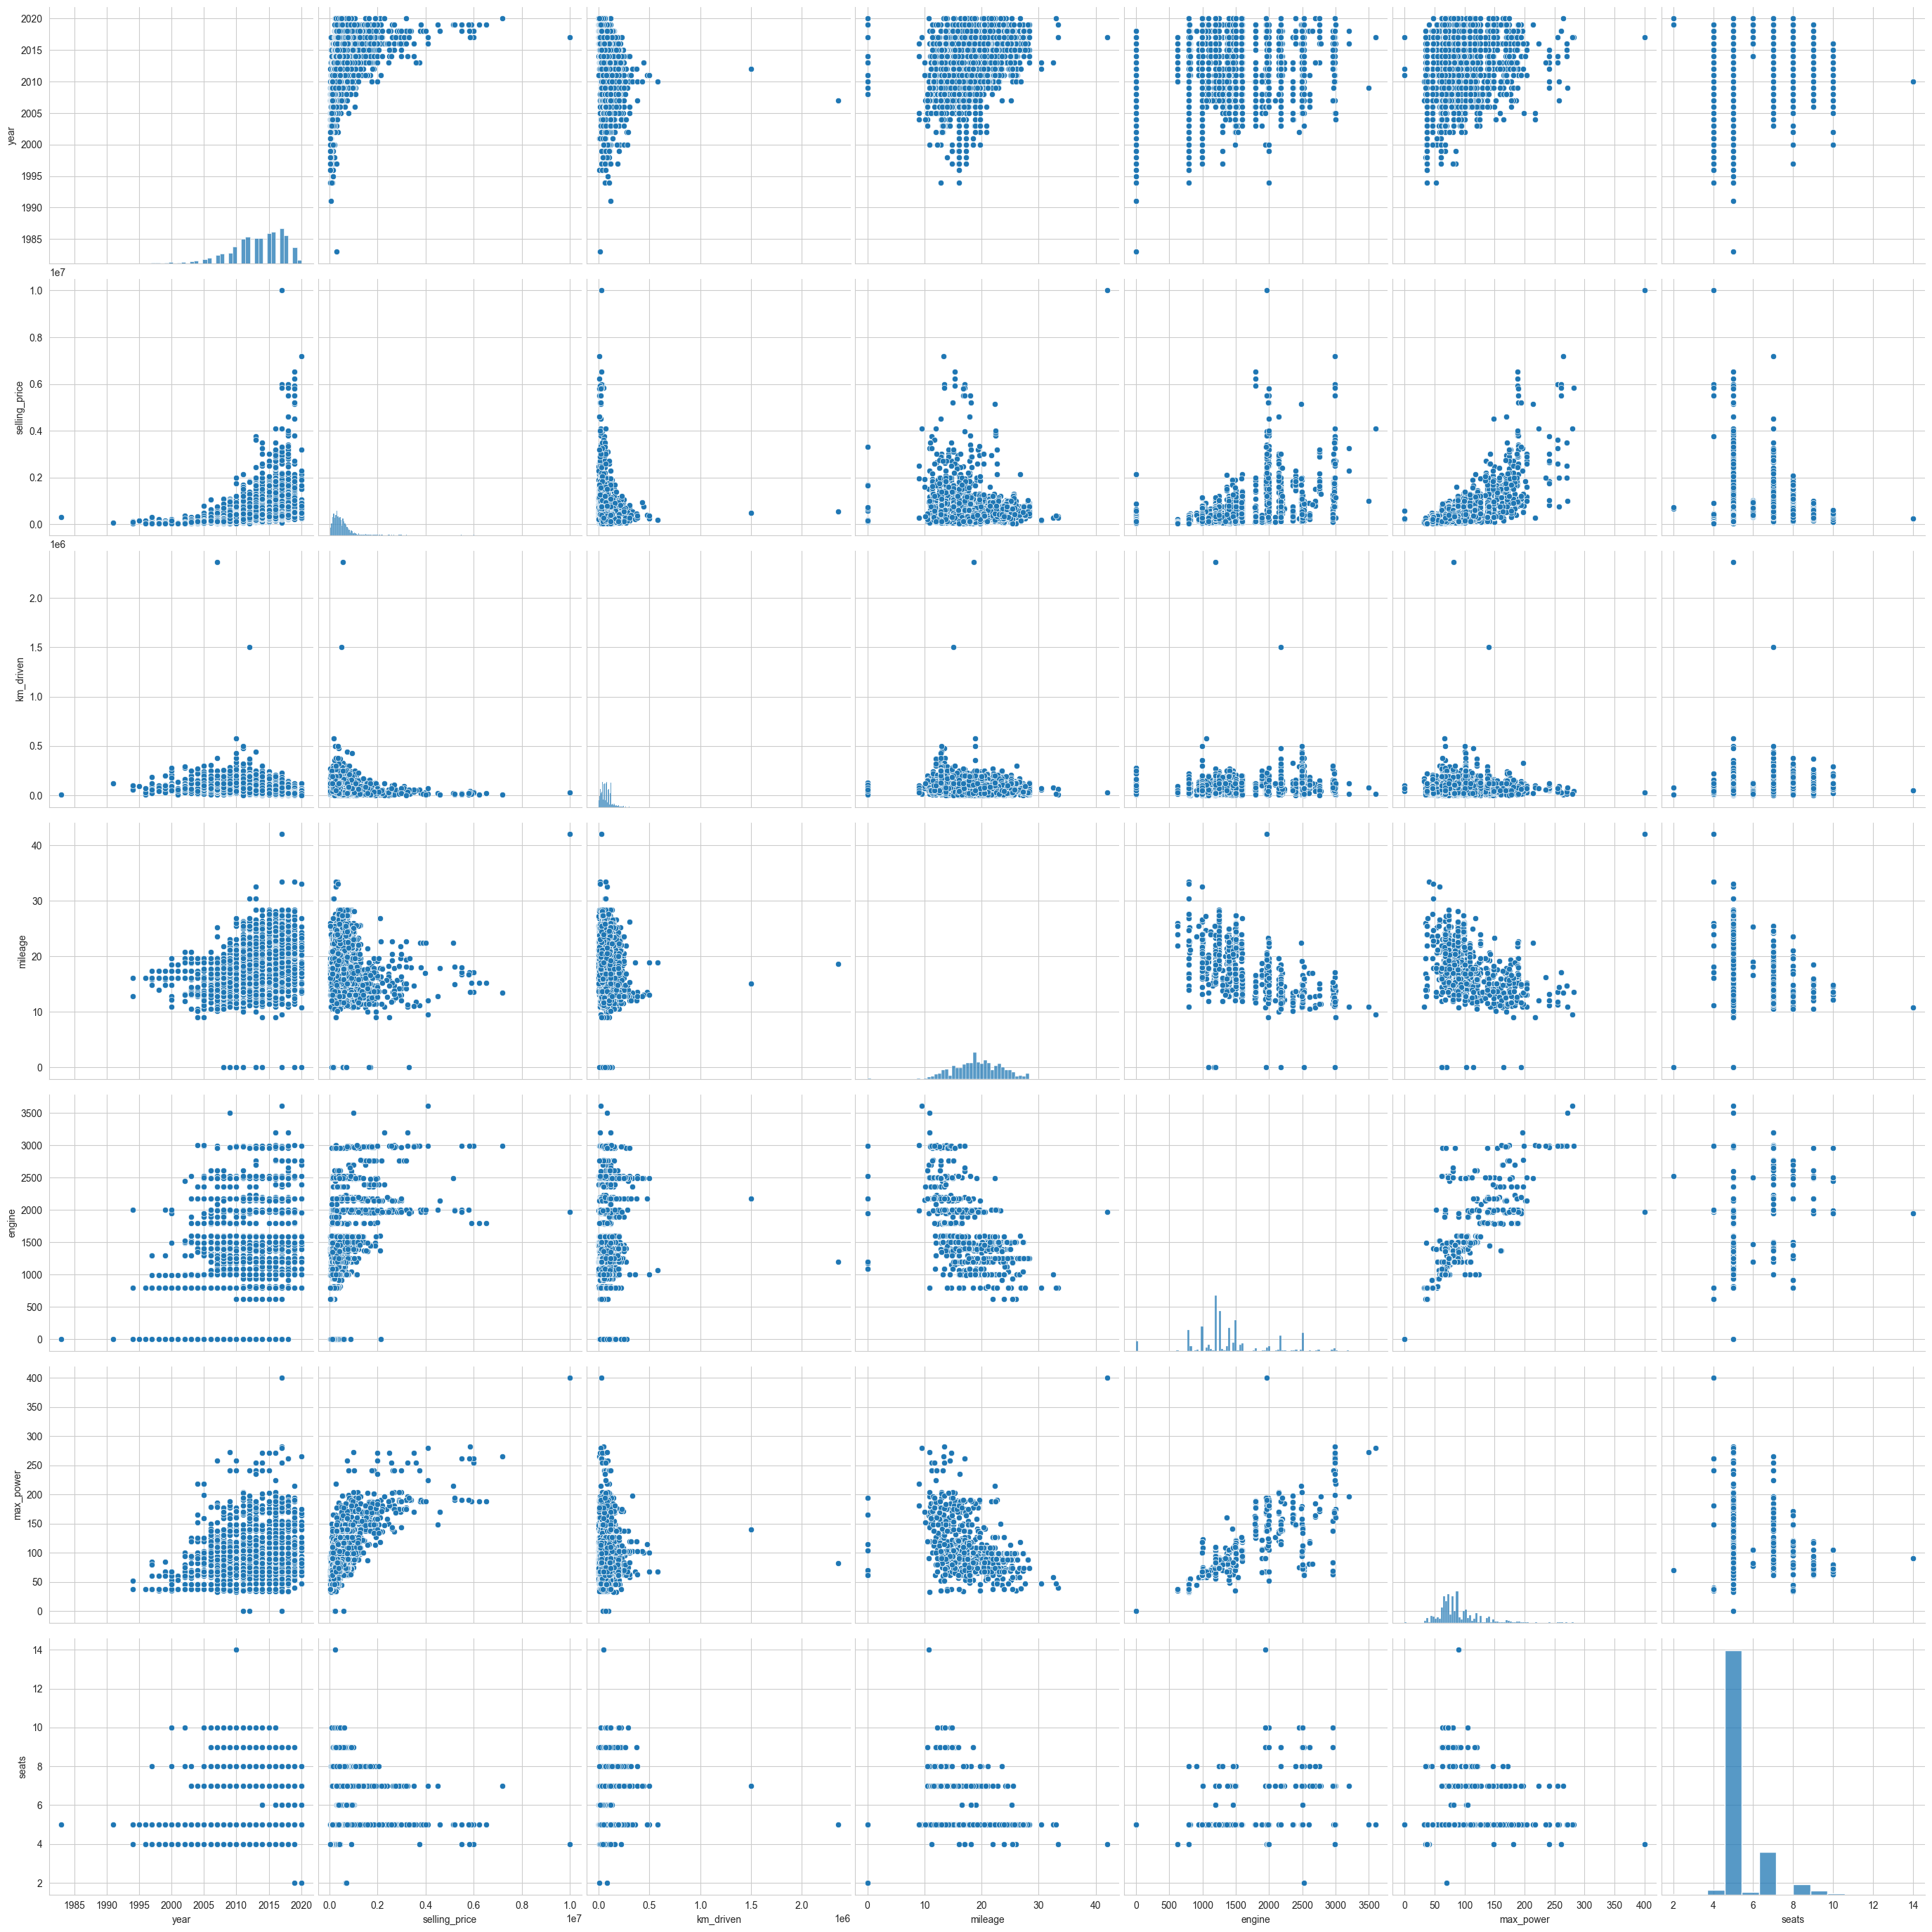

In [19]:
numeric_columns = df_train.select_dtypes(include=['number']).columns
plt.suptitle("Train Dataset")
sns.pairplot(df_train[numeric_columns], height=4)

<Figure size 640x480 with 0 Axes>

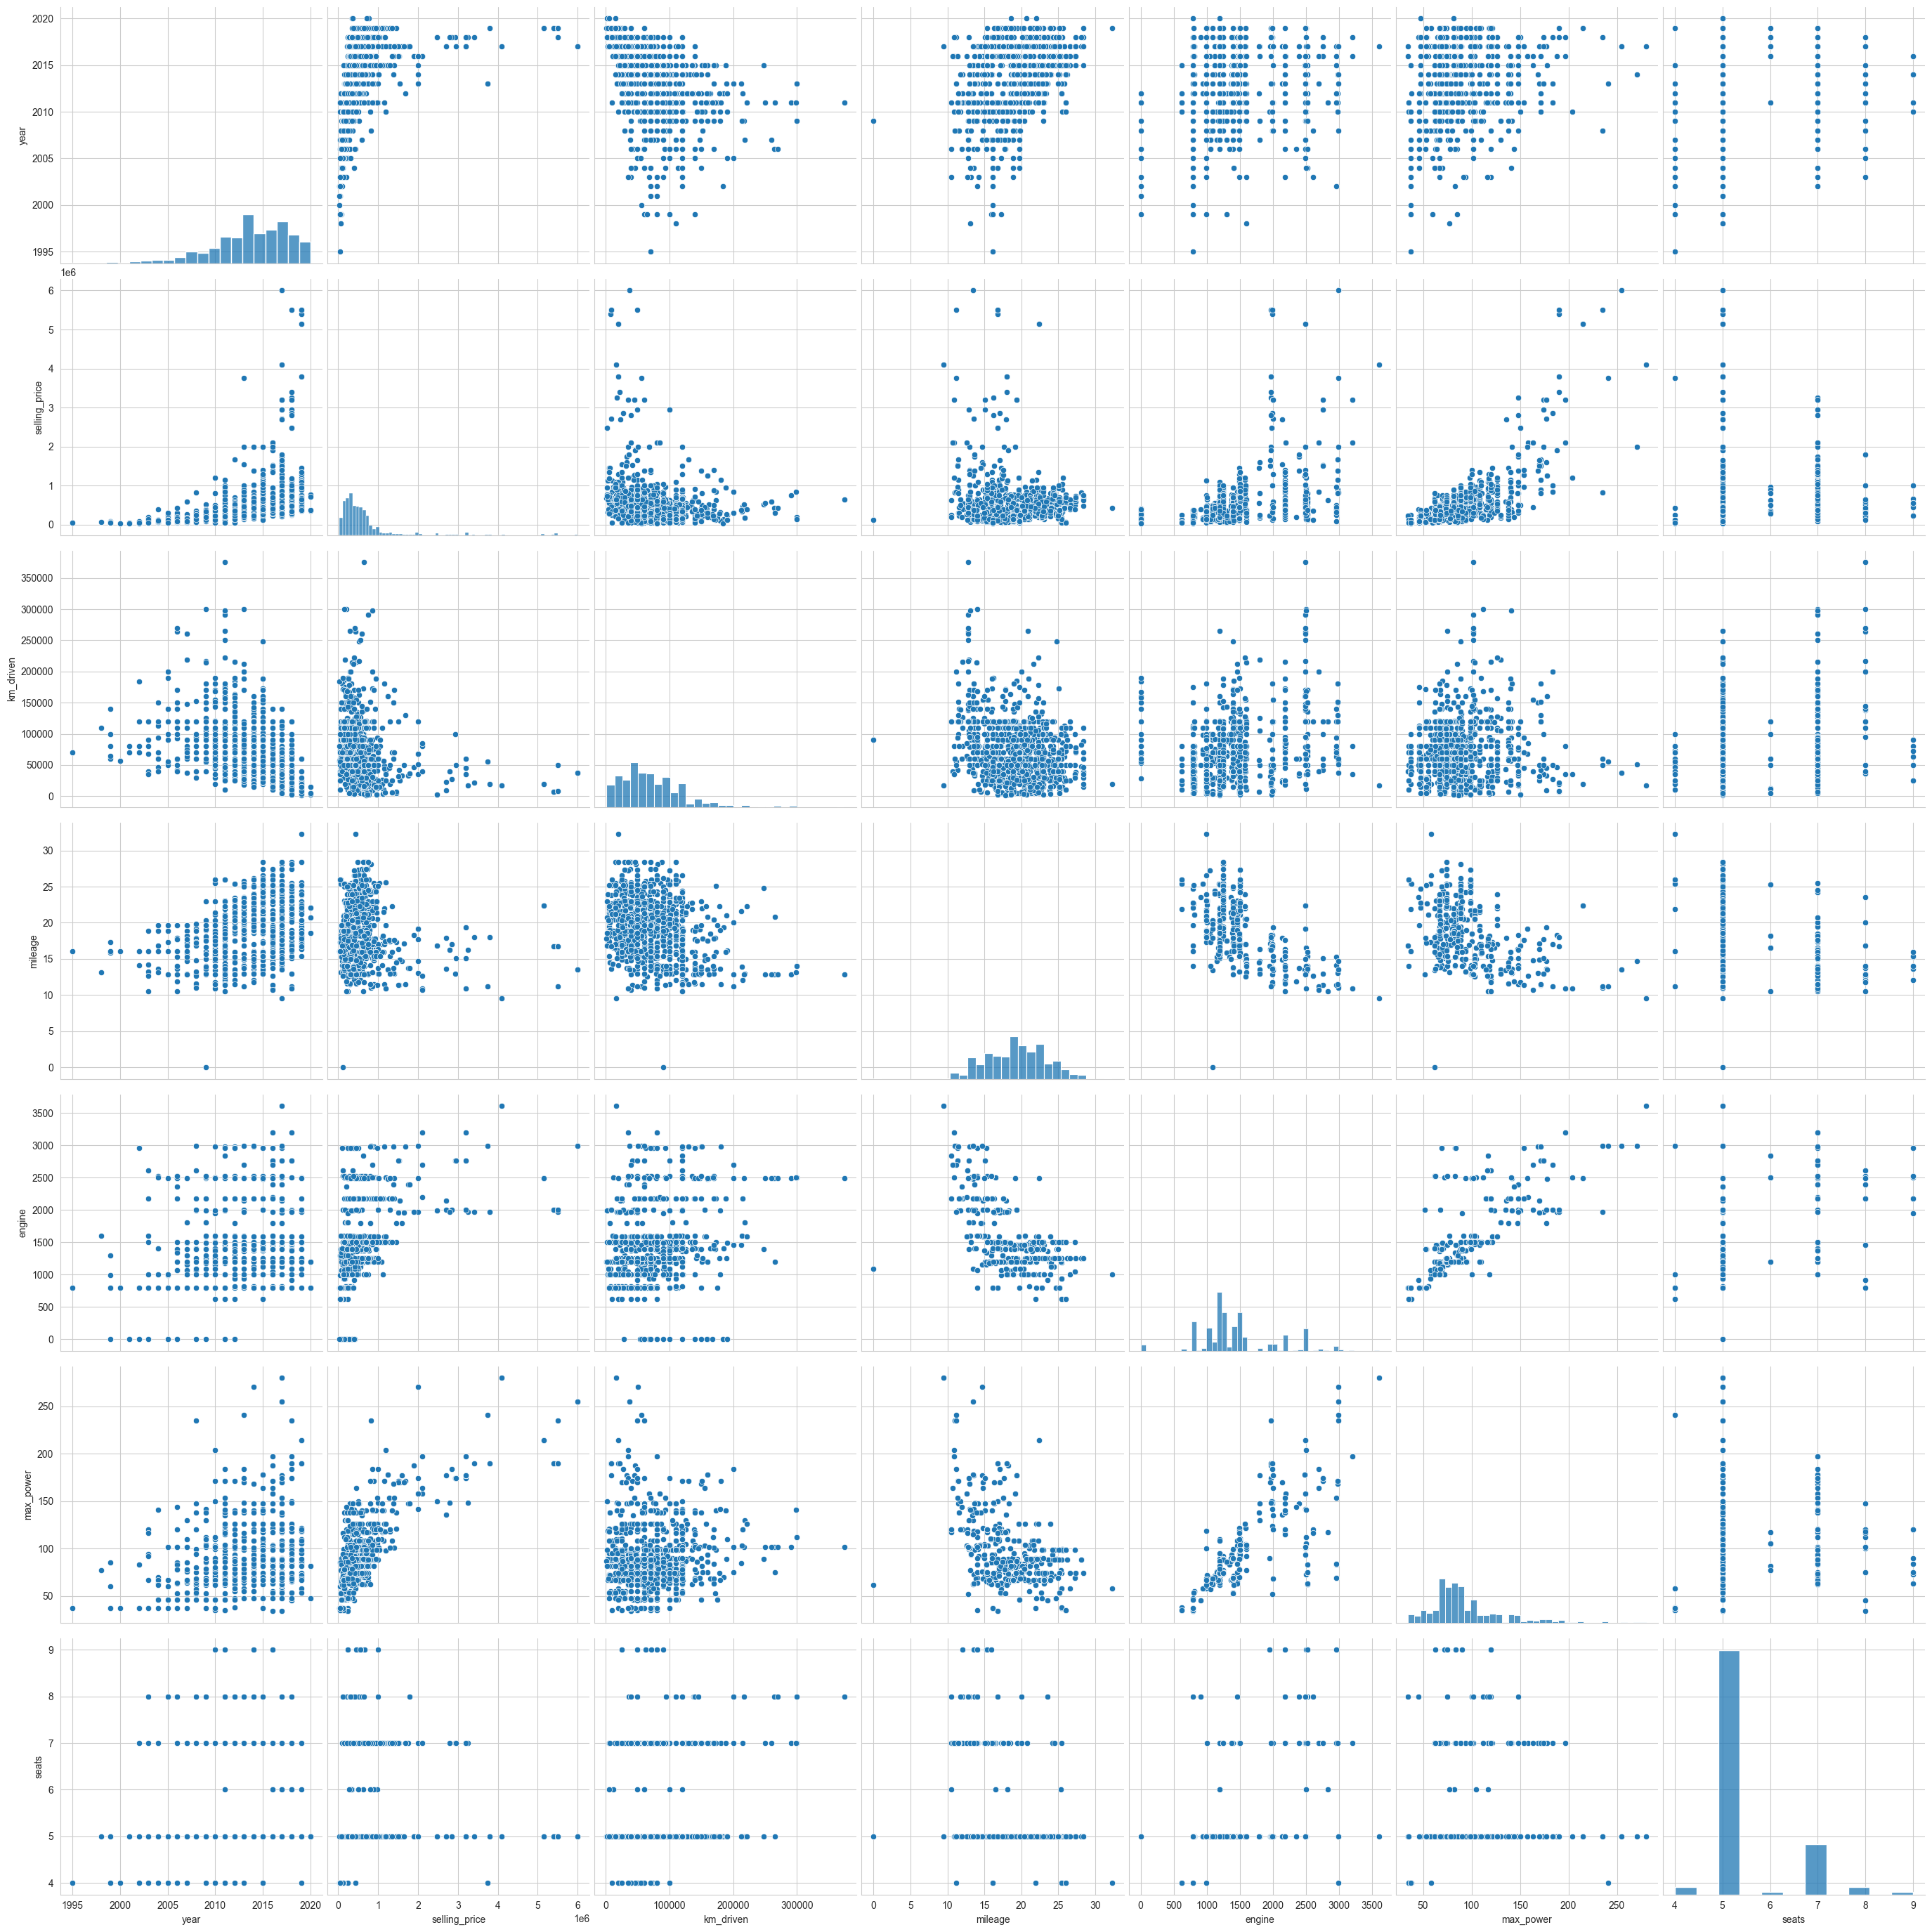

In [20]:
plt.suptitle("Test Dataset")
sns.pairplot(df_test[numeric_columns], height=4)

Анализируя связь признаков с целевой переменной по построенным графикам, можно заметить, что чем больше значения признаков year и max_power, тем выше стоимость автомобиля. Так же можно заметить, что маленьким значениям признака km_driven чаще соответствует высокая цена.

Характер связи между engine и max_power указывает на то, что двигателям с большим рабочим объёмом обычно соответствует бОльшая развиваемая мощность. График зависимости year и max_power позволяет сделать вывод, что более мощные автомобили стали производить чаще после 2005 года.

В общем и целом графики для тренировочного и тестового наборов данных оказались достаточно схожими. Можно уменьшить 2 изображения и расположить их рядом, тогда будет хорошо просматриваться характер распределения в каждой клетке. 

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [21]:
corr_matrix = df_train.select_dtypes(include=['number']).corr()
corr_matrix

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.363360  0.112162   
selling_price  0.427279       1.000000  -0.164828 -0.105939  0.438434   
km_driven     -0.368966      -0.164828   1.000000 -0.183538  0.183236   
mileage        0.363360      -0.105939  -0.183538  1.000000 -0.574404   
engine         0.112162       0.438434   0.183236 -0.574404  1.000000   
max_power      0.157376       0.695593   0.026676 -0.374699  0.682982   
seats          0.041178       0.149953   0.192328 -0.452687  0.611512   

               max_power     seats  
year            0.157376  0.041178  
selling_price   0.695593  0.149953  
km_driven       0.026676  0.192328  
mileage        -0.374699 -0.452687  
engine          0.682982  0.611512  
max_power       1.000000  0.242541  
seats           0.242541  1.000000

<Axes: >

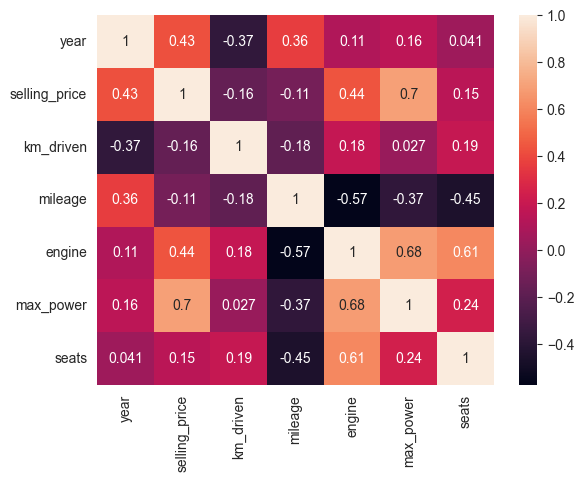

In [22]:
sns.heatmap(corr_matrix, annot=True, cbar=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- Признаки max_power и km_driven наименее скоррелированы между собой (мощность и пробег не связаны между собой).
- Между признаками max_power и selling_price наблюдается наибольшая корреляция (чем больше мощность, тем выше стоимость).
- Судя по тепловой карте корреляция между year и km_driven - отрицательная. Это означает, что с уменьшением года выпуска (то есть чем старше автомобиль), пробег имеет тенденцию увеличиваться.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

<Axes: >

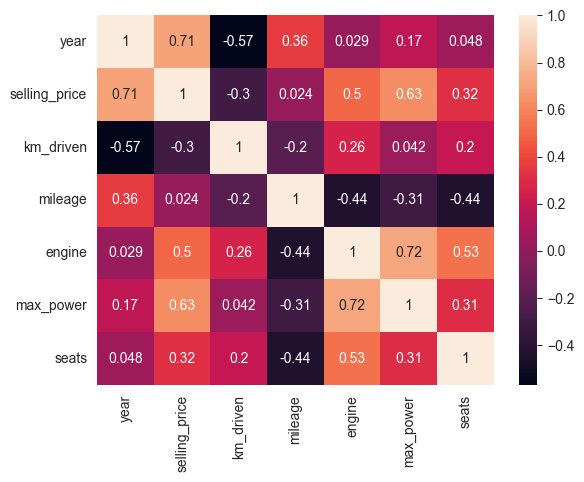

In [23]:
# Попробуем определить характер нелинейных зависимостей 
corr_matrix = df_train.select_dtypes(include=['number']).corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cbar=True)

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']


C:\Users\redgr\Desktop\HSE\ML\HW1\venv\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

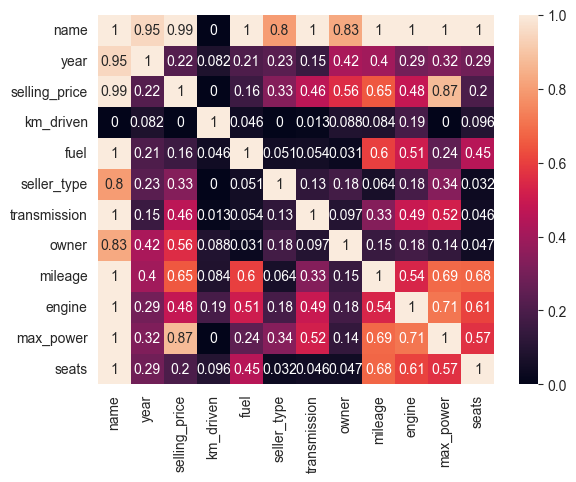

In [24]:
import phik
sns.heatmap(df_train.phik_matrix(), annot=True, cbar=True)

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [25]:
# Мы не выполняли заполнения пропусков после того как преобразовывали типы некоторых столбцов

numeric_columns = df_train.select_dtypes(include=['number'])
medians = numeric_columns.median()
df_train[numeric_columns.columns] = numeric_columns.apply(lambda x: x.fillna(medians[x.name]))

numeric_columns = df_test.select_dtypes(include=['number'])
df_test[numeric_columns.columns] = numeric_columns.apply(lambda x: x.fillna(medians[x.name]))

In [26]:
df_train[numeric_columns.columns].isnull().sum()

year             0
selling_price    0
km_driven        0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [27]:
df_test[numeric_columns.columns].isnull().sum()

year             0
selling_price    0
km_driven        0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [28]:
df_train_numeric = df_train[numeric_columns.columns]
df_test_numeric = df_test[numeric_columns.columns]

y_train = df_train_numeric['selling_price']
X_train = df_train_numeric[df_train_numeric.columns.difference(['selling_price'])]

In [29]:
assert X_train.shape == (5840, 6)

In [30]:
y_test = df_test_numeric['selling_price']
X_test = df_test_numeric[df_train_numeric.columns.difference(['selling_price'])]

In [31]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

print('Train set R2:', r2_score(y_train, y_train_pred))
print('Train set MSE:', MSE(y_train, y_train_pred))
print('Test set R2:', r2_score(y_test, y_test_pred))
print('Test set MSE:', MSE(y_test, y_test_pred))

Train set R2: 0.5902937489271429
Train set MSE: 117437519022.36282
Test set R2: 0.5929513279686341
Test set MSE: 233983200218.33688


Умеренный коэффициент $R^2$ (0.59) указывает на то, что модель объясняет значительную часть данных, но оставляет место для улучшений. Большое (с учётом масштаба) абсолютное значение MSE указывает на сложности с точным предсказанием цены.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [34]:
from sklearn.preprocessing import StandardScaler

x_scaler, y_scaler = StandardScaler(), StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)

y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

print('Train set R2:', r2_score(y_train_scaled, y_train_pred))
print('Train set MSE:', MSE(y_train_scaled, y_train_pred))
print('Test set R2:', r2_score(y_test_scaled, y_test_pred))
print('Test set MSE:', MSE(y_test_scaled, y_test_pred))

Train set R2: 0.5902937489271436
Train set MSE: 0.4097062510728565
Test set R2: 0.5929513279686307
Test set MSE: 0.8163011324960852


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [35]:
pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

Feature  Coefficient
2  max_power     0.635290
5       year     0.277134
1  km_driven    -0.077409
0     engine     0.060444
3    mileage     0.046522
4      seats    -0.017630

Признак max_power оказался наиболее информативным в предсказании цены.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [36]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train_scaled)

y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

print('Train set R2:', r2_score(y_train_scaled, y_train_pred))
print('Train set MSE:', MSE(y_train_scaled, y_train_pred))
print('Test set R2:', r2_score(y_test_scaled, y_test_pred))
print('Test set MSE:', MSE(y_test_scaled, y_test_pred))

Train set R2: 0.0
Train set MSE: 1.0000000000000002
Test set R2: -0.015680821820977853
Test set MSE: 2.036860606790344


In [37]:
lasso_model.coef_

array([ 0., -0.,  0., -0.,  0.,  0.])

Lasso-регрессия занулила все коэффициенты, что может быть связано со слишком сильной регуляризацией (большое для имеющихся данных значение коэффициента $\alpha$).

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [38]:
from sklearn.model_selection import GridSearchCV

lasso_model = Lasso()

param_grid = {'alpha': np.logspace(-3, 1, 100)} # 0.001 to 10
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, 
                           cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

lasso_model = grid_search.best_estimator_
print(f"Optimal alpha: {grid_search.best_params_['alpha']}")
print(f"Best R2 on cross-validation: {grid_search.best_score_}")
print(f"Models count: {len(param_grid['alpha']) * 10}")

Optimal alpha: 0.049770235643321115
Best R2 on cross-validation: 0.5751810816765046
Models count: 1000


In [39]:
grid_search.best_estimator_.coef_

array([ 0.        , -0.02933699,  0.60103954,  0.        , -0.        ,
        0.27240669])

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [40]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(max_iter=10000)

param_grid = {
    'alpha': np.logspace(-3, 1, 100), # 0.001 to 10
    'l1_ratio': np.linspace(0.1, 1.0, 10) # 0.1 tо 1.0
}
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid,
                           cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

elastic_net_model = grid_search.best_estimator_
print(f"Optimal alpha: {grid_search.best_params_['alpha']}")
print(f"Optimal l1_ratio: {grid_search.best_params_['l1_ratio']}")
print(f"Best R2 on cross-validation: {grid_search.best_score_}")
print(f"Models count: {len(param_grid['alpha']) * len(param_grid['l1_ratio']) * 10}")

Optimal alpha: 0.09545484566618342
Optimal l1_ratio: 0.30000000000000004
Best R2 on cross-validation: 0.5762816915508944
Models count: 10000


In [41]:
grid_search.best_estimator_.coef_

array([ 0.03669683, -0.05414542,  0.56296055,  0.        , -0.        ,
        0.2683156 ])

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [42]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40    1248   
1     Diesel  Individual       Manual          Second Owner    21.14    1498   
2     Diesel  Individual       Manual           First Owner    23.00    1396   
3     Petrol  Individual       Manual           First Owner    16.10    1298   
4     Petrol  Individual       Manual           First Owner    20.14    1197   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92    1086   
5836  Petrol  Individual       Manual          Second Owner    18.90     998   
5837  Petrol  Individual       Manual           First Owner    18.50    1197   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80    1493   
5839  Diesel  Individual       Manual           First Owner    19.30    1248   

      max_power  seats  
0         74.00      5  
1        103.52      5  
2         90.00      5  
3         88.20      5  
4         81.86      5  
...         ...    ...  
5835      62.10      5  
5836      67.10      5  
5837      82.85      5  
5838     110.00      5  
5839      73.90      5  

[5840 rows x 12 columns]

In [43]:
train_df_cat = df_train.drop(columns=['name'])
y_train_cat = train_df_cat['selling_price']
X_train_cat = train_df_cat[train_df_cat.columns.difference(['selling_price'])]

test_df_cat = df_test.drop(columns=['name'])
y_test_cat = test_df_cat['selling_price']
X_test_cat = test_df_cat[train_df_cat.columns.difference(['selling_price'])]

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [44]:
df_train['brand'] = df_train['name'].apply(lambda x: x.split(' ')[0])

In [45]:
assert X_train_cat.shape == (5840, 10)

In [46]:
X_train_cat.describe(include='object')

fuel        owner seller_type transmission
count     5840         5840        5840         5840
unique       4            5           3            2
top     Diesel  First Owner  Individual       Manual
freq      3177         3603        5223         5336

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [66]:
def drop_base_category_cols(df, category_columns):
    for cat_col in category_columns:
        related_columns = [col for col in df.columns
                           if col.startswith(f"{cat_col}_")]
        if related_columns:
            df = df.drop(columns=[related_columns[0]])
    return df

categorical_features = ['fuel', 'owner', 'seller_type', 'transmission', 'seats']
X_train_encoded = pd.get_dummies(X_train_cat, columns=categorical_features)
input_columns = X_train_encoded.columns
X_train_encoded = drop_base_category_cols(X_train_encoded, categorical_features)

X_test_encoded = pd.get_dummies(X_test_cat, columns=categorical_features)
X_test_encoded = drop_base_category_cols(X_test_encoded, categorical_features)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [69]:
X_train_encoded

engine  km_driven  max_power  mileage  year  fuel_Diesel  fuel_LPG  \
0       1248     145500      74.00    23.40  2014         True     False   
1       1498     120000     103.52    21.14  2014         True     False   
2       1396     127000      90.00    23.00  2010         True     False   
3       1298     120000      88.20    16.10  2007        False     False   
4       1197      45000      81.86    20.14  2017        False     False   
...      ...        ...        ...      ...   ...          ...       ...   
5835    1086     191000      62.10    17.92  2008        False     False   
5836     998      50000      67.10    18.90  2013        False     False   
5837    1197     110000      82.85    18.50  2013        False     False   
5838    1493     119000     110.00    16.80  2007         True     False   
5839    1248     120000      73.90    19.30  2009         True     False   

      fuel_Petrol  owner_Fourth & Above Owner  owner_Second Owner  ...  \
0           False                       False               False  ...   
1           False                       False                True  ...   
2           False                       False               False  ...   
3            True                       False               False  ...   
4            True                       False               False  ...   
...           ...                         ...                 ...  ...   
5835         True                       False               False  ...   
5836         True                       False                True  ...   
5837         True                       False               False  ...   
5838        False                        True               False  ...   
5839        False                       False               False  ...   

      seller_type_Trustmark Dealer  transmission_Manual  seats_4  seats_5  \
0                            False                 True    False     True   
1                            False                 True    False     True   
2                            False                 True    False     True   
3                            False                 True    False     True   
4                            False                 True    False     True   
...                            ...                  ...      ...      ...   
5835                         False                 True    False     True   
5836                         False                 True    False     True   
5837                         False                 True    False     True   
5838                         False                 True    False     True   
5839                         False                 True    False     True   

      seats_6  seats_7  seats_8  seats_9  seats_10  seats_14  
0       False    False    False    False     False     False  
1       False    False    False    False     False     False  
2       False    False    False    False     False     False  
3       False    False    False    False     False     False  
4       False    False    False    False     False     False  
...       ...      ...      ...      ...       ...       ...  
5835    False    False    False    False     False     False  
5836    False    False    False    False     False     False  
5837    False    False    False    False     False     False  
5838    False    False    False    False     False     False  
5839    False    False    False    False     False     False  

[5840 rows x 23 columns]

In [70]:
X_test_encoded

engine  km_driven  max_power  mileage  year  fuel_Diesel  fuel_LPG  \
0      2498     168000     112.00    14.00  2010         True     False   
1      1497      25000     108.50    21.50  2017         True     False   
2      1799     218463     130.00    12.90  2007        False     False   
3      1498     173000      98.60    25.10  2015         True     False   
4      1172      70000      65.00    16.50  2011        False     False   
..      ...        ...        ...      ...   ...          ...       ...   
995    1086     100000      68.05    19.81  2008        False     False   
996    1197      50000      81.83    18.60  2017        False     False   
997    1396      40000      90.00    23.00  2009         True     False   
998    1197      25000      78.90    20.36  2012        False     False   
999    1498     110000      98.60    26.00  2016         True     False   

     fuel_Petrol  owner_Fourth & Above Owner  owner_Second Owner  ...  \
0          False                       False               False  ...   
1          False                       False               False  ...   
2           True                       False               False  ...   
3          False                       False               False  ...   
4           True                       False                True  ...   
..           ...                         ...                 ...  ...   
995         True                       False                True  ...   
996         True                       False                True  ...   
997        False                       False               False  ...   
998         True                       False               False  ...   
999        False                       False               False  ...   

     seller_type_Trustmark Dealer  transmission_Manual  seats_4  seats_5  \
0                           False                 True        0    False   
1                           False                 True        0     True   
2                           False                False        0     True   
3                           False                 True        0     True   
4                           False                 True        0     True   
..                            ...                  ...      ...      ...   
995                         False                 True        0     True   
996                         False                 True        0     True   
997                         False                 True        0     True   
998                         False                 True        0     True   
999                         False                 True        0     True   

     seats_6  seats_7  seats_8  seats_9  seats_10  seats_14  
0      False     True    False    False         0         0  
1      False    False    False    False         0         0  
2      False    False    False    False         0         0  
3      False    False    False    False         0         0  
4      False    False    False    False         0         0  
..       ...      ...      ...      ...       ...       ...  
995    False    False    False    False         0         0  
996    False    False    False    False         0         0  
997    False    False    False    False         0         0  
998    False    False    False    False         0         0  
999    False    False    False    False         0         0  

[1000 rows x 23 columns]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [71]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train_encoded)
X_test_scaled = x_scaler.transform(X_test_encoded)

ridge_model = Ridge()

param_grid = {'alpha': np.logspace(-3, 3, 100)} # 0.001 to 1000
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid,
                           cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_cat)

print(f"Optimal alpha: {grid_search.best_params_['alpha']}")
print(f"Best R2 on cross-validation: {grid_search.best_score_}")

ridge_model = grid_search.best_estimator_
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

print('Train set R2:', r2_score(y_train_cat, y_train_pred))
print('Train set MSE:', MSE(y_train_cat, y_train_pred))
print('Test set R2:', r2_score(y_test_cat, y_test_pred))
print('Test set MSE:', MSE(y_test_cat, y_test_pred))

Optimal alpha: 572.236765935022
Best R2 on cross-validation: 0.6200063231115355
Train set R2: 0.6618287086326022
Train set MSE: 96932857037.89162
Test set R2: 0.6078859172839253
Test set MSE: 225398371813.17474


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [73]:
def business_metric(y_true, y_pred):
    relative_error = abs(y_true - y_pred) / y_true
    return (relative_error <= 0.1).mean()

# Linear test.
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_cat)
y_test_pred = linear_model.predict(X_test_scaled)
print('LINEAR')
print('R2:', r2_score(y_test_cat, y_test_pred))
print('Business metric:', business_metric(y_test_cat, y_test_pred))

# Lasso test.
lasso_model = Lasso()
param_grid = {'alpha': np.logspace(-3, 1, 100)} # 0.001 to 10
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, 
                           cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_cat)

lasso_model = grid_search.best_estimator_
y_test_pred = lasso_model.predict(X_test_scaled)
print('\nLASSO')
print('Optimal alpha:', grid_search.best_params_['alpha'])
print('R2:', r2_score(y_test_cat, y_test_pred))
print('Business metric:', business_metric(y_test_cat, y_test_pred))

# ElasticNet test.
elastic_net_model = ElasticNet(max_iter=10000)
param_grid = {
    'alpha': np.logspace(-3, 1, 50), # 0.001 to 10
    'l1_ratio': np.linspace(0.1, 1.0, 10) # 0.1 tо 1.0
}
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid,
                           cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_cat)

elastic_net_model = grid_search.best_estimator_
y_test_pred = elastic_net_model.predict(X_test_scaled)
print('\nELASTICNET')
print('Optimal alpha:', grid_search.best_params_['alpha'])
print('Optimal l1_ratio:', grid_search.best_params_['l1_ratio'])
print('R2:', r2_score(y_test_cat, y_test_pred))
print('Business metric:', business_metric(y_test_cat, y_test_pred))

# Ridge test.
ridge_model = Ridge()
param_grid = {'alpha': np.logspace(-3, 3, 50)} # 0.001 to 1000
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid,
                           cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_cat)

ridge_model = grid_search.best_estimator_
y_test_pred = ridge_model.predict(X_test_scaled)
print('\nRIDGE')
print('Optimal alpha:', grid_search.best_params_['alpha'])
print('R2:', r2_score(y_test_cat, y_test_pred))
print('Business metric:', business_metric(y_test_cat, y_test_pred))

LINEAR
R2: 0.6242706638785491
Business metric: 0.242


C:\Users\redgr\Desktop\HSE\ML\HW1\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.320e+13, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(



LASSO
Optimal alpha: 10.0
R2: 0.623214514993736
Business metric: 0.244

ELASTICNET
Optimal alpha: 1.0481131341546852
Optimal l1_ratio: 0.9
R2: 0.6069696590028169
Business metric: 0.244

RIDGE
Optimal alpha: 568.9866029018293
R2: 0.6079604178590747
Business metric: 0.247


Согласно представленной бизнес-метрике наиболее подходящей моделью оказывается обычная Ridge Regression (с учётом одинаковой предобработки входных признаков: используем категориальные признаки и применяем масштабирование).

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [74]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)

with open("scaler.pkl", "wb") as f:
    pickle.dump(x_scaler, f)

print(X_train_encoded.columns)

Index(['engine', 'km_driven', 'max_power', 'mileage', 'year', 'fuel_CNG',
       'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'seats_2', 'seats_4',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10',
       'seats_14'],
      dtype='object')


In [ ]:
from pydantic import BaseModel
from typing import List
from fastapi import FastAPI

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...

@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

